In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
test=ds['test']
test_gt=np.array(ds['test']['label'])

In [14]:
steps=[1,2,3,4,5]
llama_accuracy=[]
llama_fp=[]
llama_fn=[]
for s in steps:
    llama_pred=np.load(f'llama3_degree_step_{s}.npy')
    llama_pred=np.array([int(i.replace('<|eot_id|>', '').split('Label:')[1].strip()) for i in llama_pred])
    llama_accuracy.append(accuracy_score(test_gt, llama_pred))
    _,l_fp,l_fn,_=confusion_matrix(test_gt, llama_pred).ravel()
    llama_fp.append(l_fp/len(test))
    llama_fn.append(l_fn/len(test))
heuristis_pred=np.array(test['min_angle'])<=5
heuristic_accuracy.append(accuracy_score(test_gt, heuristis_pred))

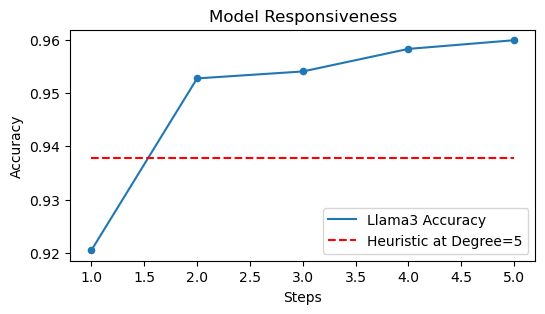

In [21]:
plt.figure(figsize=(6,3))
plt.plot(steps,llama_accuracy,label='Llama3 Accuracy')
plt.scatter(steps, llama_accuracy,s=20)
plt.hlines(y=heuristic_accuracy,xmin=1,xmax=5,color='red',label='Heuristic at Degree=5', linestyle='dashed')
plt.title('Model Responsiveness')
plt.ylabel('Accuracy')
plt.xlabel('Steps')
plt.legend()
pass